# 회귀  
## 회귀 소개  
* 회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법.  
(ex) 아파트의 방 개수, 방 크기, 주변 학군 등 여러 개의 독립변수에 따라 아파트 가격이라는 종속변수가 어떤 관계를 나타내는지 모델링하고 예측.  
Y = W1*X1 + W2*X2 + W3*X3 + ... + Wn&Xn  
        1) Y : 종속변수(아파트 가격).  
        2) X1 X2, .., Xn : 방 개수 방 크기, 주변 학군 등의 독립변수.  
        3) W1, W2, ..., Wn : 독립변수의 값에 영향을 미치는 회귀 계수(Regression coefficients).  
머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것.  
<br>

* 회귀 유형의 종류  

독립변수 개수 | 회귀 계수의 결합
---|---
1개 : 단일 회귀 | 선형 : 선형 회귀
여러 개 : 다중 회귀 | 비선형 : 비선형 회귀  

    1) 선형 회귀가 가장 많이 사용됨.  
    2) 선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식.  
    3) 선형 회귀는 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉠 수 있음.  
    4) 규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것.  
    
<br>

* 대표적인 선형 회귀 모델  
     1) **일반 선형 회귀** : 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)을 적용하지 않은 모델.  
     2) **릿지(Ridge)** : 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제란 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델.  
     3) **라쏘(Lasso)** : 선형 회귀에 L1 규제를 적용한 방식. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것. L1 규제를 피처 선택 기능이라고도 부름.  
     4) **엘라스틱넷(ElasticNet)** : L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터셋에 적용되고, L1 규제로 피처의 개수를 줄이면서 L2 규제로 계수 값의 크기를 조정함.  
     5) **로지스틱 회귀(Logistic Regression)** : 분류에 사용되는 선형 모델. 매우 강력한 분류 알고리즘.  
     
<br><br>
## 단순 선형 회귀를 통한 회귀 이해  
* 단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나.  
* (ex) 주택 가격이 주택의 크기로만 결정된다.  
    1) X축이 주택의 크기 축(평당 크기)이고 Y축이 주택의 가격축일 때  
    2) 예측값 **𝑌 ̂ = w0 + w1*X** 로 계산할 수 있음.  
    3) 예측값을 구하는 식에서 w0와 w1을 회귀 계수라 함.  

<br>
* 잔차  
    <img src='https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F997E924F5CDBC1A6283C93'>  
    
    1) 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값.  
    2) 잔차의 합이 최소가 되는 모델이 최적의 회귀 모델.  
    3) 잔차의 합을 계산하는 방식으로는
        1. 절댓값을 취해서 더하는 방식(Mean Absolute Error)  
        2. 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual Sum of Square)  
    4) 일반적으로 미분 등의 계산을 편리하게 하기 위해 RSS 방식으로 오류합을 구함.  
    
𝑅𝑆𝑆(𝑤_0, 𝑤_1 )=1/𝑁 ∑24_(𝑖=1)^𝑁▒〖(𝑦_𝑖−(𝑤_0+𝑤_1∗𝑥_𝑖 ))〗^2 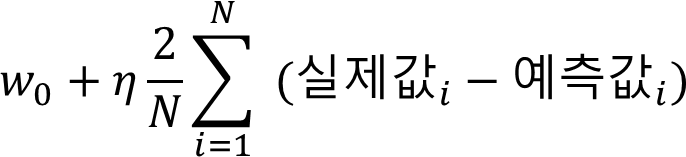  
    1) RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w 변수(회귀 변수)가 중심 변수임.  
    2) 회귀에서 RSS는 비용(Cost)이며 w변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 함.  
    3) 비용 함수를 손실함수(loss function)라고도 함.  
    
<br>

## 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개  
* 어떻게 하면 비용 함수가 최소가 되는 W 파라미터를 구할 수 있을까? -> 경사 하강법을 이용한다.
* **경사 하강법** : W 파라미터가 많은 고차원 방정식에서도 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 방식.  
* **즉, '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식.**  
<img src='http://postfiles16.naver.net/MjAxODEwMjhfNzEg/MDAxNTQwNzE0MTk1MDI0.Bqj9izyuLVZjOkG8etFeQtS5RWUc-0ZZFuijqtW2Hf4g.0amq4C1J19leChlkvdscuC__FfmoN353wumTz0OAG70g.PNG.qbxlvnf11/0_rBQI7uBhBKE8KT-X.png?type=w773'>  
* R(w)를 최소화하는 w0와 w1의 값은 각각 r(w)를 w0, w1으로 순차적으로 편미분을 수행해 얻을 수 있음.  
* 경사 하강법의 일반적인 프로세스  
    [w1, w0를 RSS식에 대해 편미분하는 식]  
    𝑤_1+𝜂 2/𝑁 ∑24_(𝑖=1)^𝑁▒〖𝑥_𝑖∗(〖실제값〗_𝑖−〖예측값〗_𝑖)〗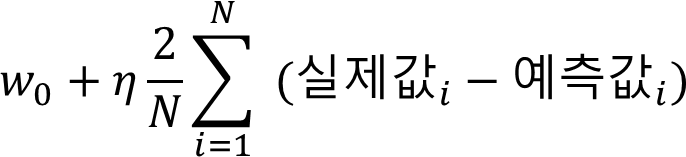  
    𝑤_0+𝜂 2/𝑁 ∑24_(𝑖=1)^𝑁▒〖 (〖실제값〗_𝑖−〖예측값〗_𝑖)〗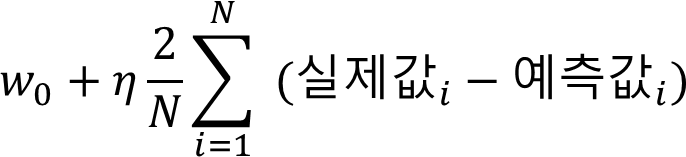  
    (여기서 𝜂는 편미분 값이 너무 클 경우를 대비해 사용하는 보정 계수. '학습률'이라고 함.)  
    <br>  
    **Step1 : w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산.**  
    **Step2 : w1을 RSS식을 w1에 대해 편미분한 값으로, w0을 RSS식을 w0에 대해 편미분한 값으로 업데이트한 후 다시 비용 함수의 값을 계산.**    
    **Step3 : 비용 함수의 값이 감소했으면 다시 Step2를 반복. 비용 함수의 값이 감소하지 않으면 그때의 w1, w0를 구하고 반복 중지.**  

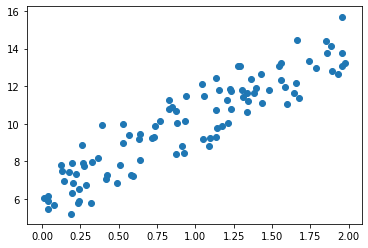

In [1]:
'''
경사 하강법을 파이썬 코드로 구현해보기
간단한 회귀식인 y = 4X + 6을 근사하기 위한 100개의 데이터셋을 만들고 경사 하강법을 이용해 회귀 w0, w1 도출하기
'''
# 데이터셋 만들기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
# np.random.rand(m, n) : 0~1의 균일분포 표준정규분포 난수를 matrix array(m, n) 생성
X = 2 * np.random.rand(100, 1)
# np.random.randn(m, n) : 평균 0, 표준편차 1의 가우시안 표준정규분포난수를 matrix array(m, n) 생성
y = 6 + 4*X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [5]:
# 비용 함수 정의 
# get_cost() : 실제 y값과 예측된 y값을 인자로 받아서 실제값-예측값의 제곱의 합을 데이터 갯수로 나눈 값을 반환함.
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [6]:
'''
get_weight_updates() : w1과 w2를 업데이트 할 w1_update, w0_update를 반환. 
즉 위에서 RSS식을 w0, w1에 대해 편미분하는 식을 구현하고 그 식으로 만들어진 업데이트된 w0, w1를 반환하는 함수
'''
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    # y예측값 : w0 + X(1)*w1 + X(2)*w1 + ... + X(100)*w1
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산(이전의 w1, w0dp RSS식을 w1, w0에 대하여 편미분한 값을 더함)
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [7]:
# gradient_descent_steps() : get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트 하는 함수
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [9]:
# gradient_descent_steps()를 호출해 w1과 w0 구해 보기
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1 : {0:.3f}, w0 : {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print("Gradient Descent Total Cost : {0:.4f}".format(get_cost(y, y_pred)))

w1 : 4.022, w0 : 6.162
Gradient Descent Total Cost : 0.9935


실제 선형식인 y = 4X + 6과 유사하게 w1은 4.022, w0는 6.162가 도출됨.

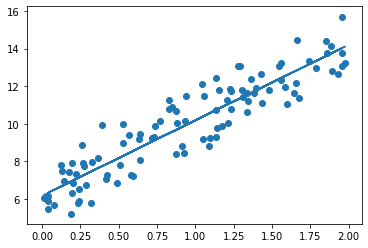

In [13]:
# y_pred에 기반해 회귀선 그려 보기
plt.scatter(X, y)
plt.plot(X, y_pred)

* 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있음.  
* 따라서 실전에서는 대부분 확률적 경사하강법(Stochastic Gradient Descent), 미니 배치 확률적 경사 하강법을 사용함.  
* 확률적 경사 하강법은 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도를 보장함.  

In [16]:
'''
미니 배치 확률적 경사 하강법 구현해보기
gradient_descent_steps()와 크게 다르진 않지만 전체 X, y 데이터에서 랜덤하게 batch_sze만큼 데이터를 추출해 이를 기반으로 
w1_update, w0_update를 계산함.
'''
# stochastic_gradient_descent_steps() : 미니 배치 확률적 경사 하강법을 구현하는 함수
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 10000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        # np.random.permutation() : numpy array를 복사해서 랜덤하게 섞는 메서드.
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [20]:
# stochastic_gradient_descent_steps()를 이용해 w1, w0 및 예측 오류 비용을 계산
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print("Stochastic Gradient Descent Total Cost : {0:.4f}".format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost : 0.9937


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측  
### LinearRegression 클래스 - Ordinary Least Squares  
* LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스.  
* 입력 파라미터  
    1) fit_intercept : 디폴트는 True. intercept(절편)값을 계산할 것인지말지를 지정함. 만일 False이면 intercept가 사용되지 않고 0으로 지정됨.  
    2) normalize : 디폴트는 False. False인 경우 이 파라미터 무시. True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화함.  
* 속성  
    1) coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성.
    2) intercept_ : intercept 값.
* 다중공선성(multi-collinearity)  
    1) Ordinary Least Squres 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음.  
    2) 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해지는데 이러한 현상을 다중공선성 문제라고 함.  
    3) 일반적으로 상관관계가 높은 피처가 만은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용함.  
    4) 매우 많은 피처가 다중 공선성 문제를 가지고 있으면 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있음.  

<br>

### 회귀 평가 지표  
* 회귀 성능을 평가하는 지표  
    1) MAE : Mean Absolute Error(MAE)이며 실제값과 예측값의 차이를 절댓값으로 변환해 평균한 것.  
    2) MSE : Mean Squared Error(MSE)이며 실제값과 예측값의 차이를 제곱해 평균한 것.  
    3) RMSE : Root Mean Squared Error(RMSE). MSE값이 실제 오류 평균보다 더 커지는 특성을 방지하기 위해 MSE에 루트를 씌운 것.  
    4) R^2 : 실제 값의 분산 대비 예측 값의 분산 비율을 지표로 함. 1에 가까울수록 예측 정확도가 높음.  
    <br>
    
* scoring 함수에서 회귀 평가 지표를 사용할 때 주의해야 할 점.  
    scoring 함수(cross_val_score, GridSearchCV 등)는 score가 높을수록 좋은 평가로 평가함. 하지만 회귀 성능 평가 지표를 높으면 나쁜 모델을 의미하기 때문에 평가 지표를 음수로 만들어 작은 오류값이 더 큰 숫자로 인식하게 함. 그래서 scoring 함수 파라미터의 'neg_mean_absolute_error'가 의미하는 것이 -1*mean_absolute_error임.  
    
    <br>
    
### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현  

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print("Boston 데이터 세트 크기 : ", bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
# boston 데이터셋은 Null값은 없고 모두 float형
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


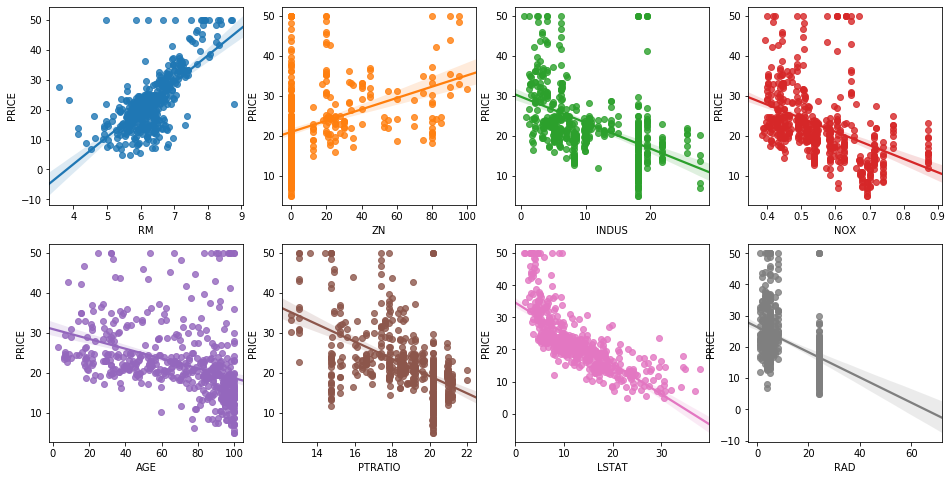

In [51]:
# 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화하기.
# RM, ZN, INDUS, NOX, AGE, PTRATIO, LSTAT, RAD 총 8개의 칼럼에 대해 값이 증가할수록 PRICE값이 어떻게 변하는지 확인.
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
# matplotlib.subplots() : 여러 개의 그래프를 한번에 표현하기 위해 사용.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # seaborn.regplot() : X, Y축 값의 산점도와 함께 선형 회귀 직선을 그려줌.
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

* RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남.  
* RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 큼. -> 방의 크기가 클수록 가격이 증가함.  
* LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 큼. -> LSTAT이 적을 수록 PRICE가 증가함.

In [52]:
# LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# 학습과 테스트 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE : {0:.3f}, RMSE : {1:.3f}".format(mse, rmse))
print("Variance score : {0:.3f}".format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [53]:
# lr 모델의 intercept(절편)과 coefficients(회귀 계수) 값 확인하기
print("절편 값 : ", lr.intercept_)
print("회귀 계수값 : ", np.round(lr.coef_, 1))

절편 값 :  40.9955951721646
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [54]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [55]:
# cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정해보기
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# corss_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829


## 다항 회귀와 과(대)적합/과소적합 이해  
### 다항 회귀 이해  
* 다항(Polynomial) 회귀 : 회귀가 2차, 3차 방정식과 같은 다항식으로 표현되는 것.  
* 다항 회귀의 표현 : y = w0 + w1*x1 + w2*x2 + w3*x1*x2 + w4*x1^2 + w5*x2^2  
* 다항 회귀는 선형 회귀임.  
* 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않지만, 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 위한 선형 모델에 적용시키는 방법을 사용해 구현함.  
* 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환함.  

In [56]:
# PolynomialFeatues를 이용해 단항값 [x1, x2]를 2차 다항값으로 [1, x1, x2, x1^2, x1x2, x2^2]으로 변환하기
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print("일차 단항식 계수 피처 : \n", X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처 : \n", poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [57]:
# 3차 다항 회귀 결정 함수식 y = 1 + 2x1 + 3x1^2 = 4x2^3을 설정하는 함수 만들기
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

X = np.arange(4).reshape(2, 2)
print("일차 단항식 계수 feature : \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값 : \n", y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [58]:
# 3차 다항식 변환
# PolynomialFeatues(degree=3)이면 [x1, x2]를 [x1, x2, x1^2, x1x2, x2^2, x1^3, x1^2x2, x1x2^2, x2^3]의 10개의 다항 계수로 변환.
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print("3차 다항식 계수 feature : \n", poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print("Polynomial 회귀 계수\n", np.round(model.coef_, 2))
print("Polynomial 회귀 Shape : ", model.coef_.shape)

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print("Polynomial 회귀 계수\n", np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해  
* 차수가 높아질수록 과적합의 문제가 크게 발생함.  

In [62]:
# 사이킷런에서 다항 회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예제 구현
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_func(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_func()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_func(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232057 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898890e+05 -1.87415330e+06  2.03715477e+07
 -1.44872835e+08  7.09313514e+08 -2.47065254e+09  6.24559926e+09
 -1.15676340e+10  1.56894750e+10 -1.54005880e+10  1.06457188e+10
 -4.91377277e+09  1.35919599e+09 -1.70380755e+08] 입니다.
Degree 15 MSE는 180513241.13490218 입니다.


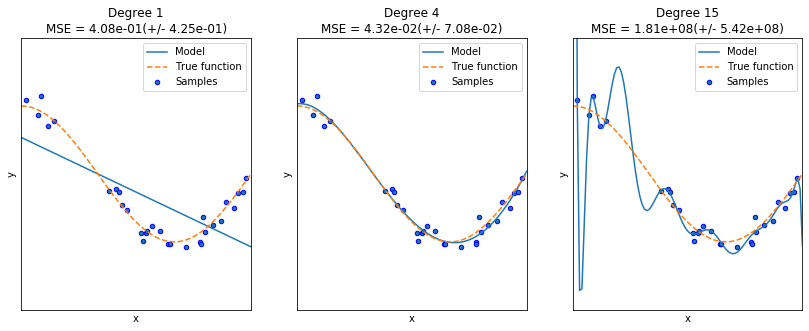

In [63]:
# 다항식 차수를 각각 1, 4, 15로 변경하면서 MSE 값을 구해 차수별 예측 성능을 평가해보기
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    # plt.subplot(i, j, k) : 크기가 i*j인 그래프 중 k번째
    ax = plt.subplot(1, len(degrees), i+1)
    # plt.setp() : 선 모양을 바꾸는 메서드
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), 
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print("\nDegree {0} 회귀 계수는 {1} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print("Degree {0} MSE는 {1} 입니다.".format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    # np.linspace() : 시작점과 끝점을 균일 간격으로 나눈 점들을 생성.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_func(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

* Degree 1과 같이 차수가 너무 작으면 과소적합 모델이 생성됨.  
* Degree 15와 같이 차수가 너무 크면 과적합 모델이 생성됨.  
* 이에 반에 Degree 4는 가장 정확한 성능을 보이는 예측 모델임. 이를 균형 잡힌(Balanced) 모델이라 함.  
<br>

### 편향-분산 트레이드오프(Bias-Varience Trade off)  
* Degree 1과 같은 모델은 매우 단순화된 모델로 지나치게 한 방향성으로 치우친 경향이 있음. -> 고편향(High Bias)성을 가짐.  
* Degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가짐. -> 고분산(High Varience)성을 가짐.  
<img src='https://t1.daumcdn.net/cfile/tistory/99CDCC33599AC28F07'>  

    1) 저편향/저분산(Low Variance/Low Bias) : 예측 결과가 실제 결과에 매우 잘 근접. 아주 뛰어난 성능을 보여줌.  
    2) 저편향/고분산(Low Variance/High Bias) : 예측 결과가 실제 결과와 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포됨.  
    3) 고편향/저분산(High Variance/Low Bias) : 정확한 결과에서 벗어나지만 예측 부분이 특정 부분에 집중돼 있음.  
    4) 고편향/고분산(High Variance/High Bias) : 정확한 예측 결과를 벗어나면서 넓은 부분에 분포돼 있음.  
    
<br>

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F996DB433599AC34225B9BD'>

    1) 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있음.  
    2) 편향이 높아지면 분산이 낮아짐. -> 과소적합.  
    3) 분산이 높아지면 편향이 낮아짐. -> 과적합.  
    4) 따라서 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법임.  
<br>

## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷  
### 규제 선형 모델의 개요  
* 지금까지의 선형 모델의 비용 함수의 목표 -> RSS 최소화(실제값과 예측값의 차이를 최소화) -> But, 문제 발생.  
    1) 학습 데이터에 지나치게 맞추게 됨.(과적합 발생).  
    2) 회귀 계수가 쉽게 커짐.  
* 따라서 최적 모델을 위한 Cost 함수 구성 요소 : RSS 최소화 + 회귀계수 크기 제어의 균형.  
    **비용함수 목표 = Min(RSS(W) + alpha*|W|^2)**  
        1) alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터.  
        2) alpha=0 -> 비용 함수는 Min(RSS(W)). alpha가 감소할수록 RSS(W)가 최소화 되어야 함.  
        3) alpha=무한대 -> W를 0에 가깝도록 최소화 시켜야 함.  
* **규제(Regularization)**  
    1) 규제 : 비용 함수에 alpha값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식.  
    2) L2 규제 : W 제곱에 대해 페널티를 부여하는 방식 -> 릿지(Ridge) 회귀.  
    3) L1 규제 : W의 절댓값에 대해 페널티 부여, 영향력이 크지 않은 회귀 계수 값을 0으로 변환. -> 라쏘(Lasso) 회귀.  
<br>

### 릿지 회귀  
* 사이킷런은 Ridge 클래스를 통해 릿지 회귀를 구현.  
* Ridge 클래스의 주요 생성 파라미터는 alpha. alpha를 통해 비용 함수를 최소화.  

In [65]:
# 보스턴 주택 가격을 Ridge 클래스를 이용해 예측.
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSe scores : ", np.round(neg_mse_scores, 3))
print(" 5 folds 의 개별 RMSE scores : ", np.round(rmse_scores, 3))
print(" 5 folds 의 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSe scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518


In [66]:
# 릿지의 alpha값을 변화시키며 RMSE와 회귀 계수 값의 변화를 살펴보기
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(" 5 folds 의 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 평균 RMSE : 5.829
 5 folds 의 평균 RMSE : 5.788
 5 folds 의 평균 RMSE : 5.653
 5 folds 의 평균 RMSE : 5.518
 5 folds 의 평균 RMSE : 5.330


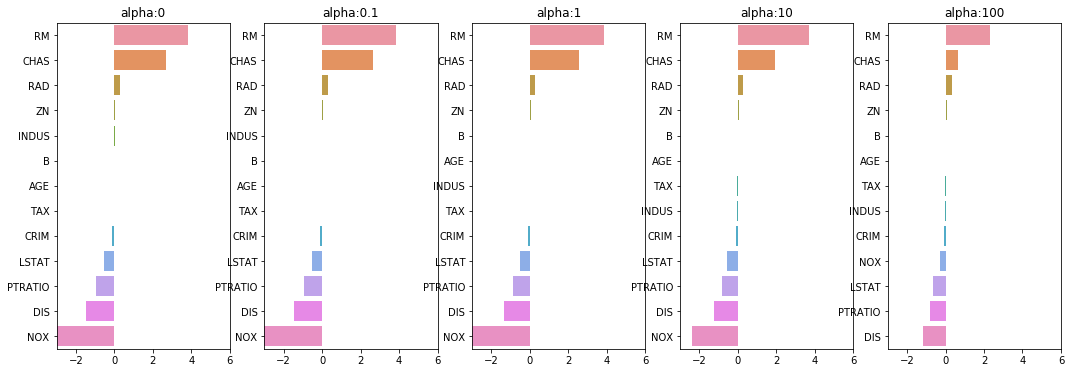

In [68]:
# alpha값의 변화에 따른 피처의 회귀 계수 값 시각화
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 aixs의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현.
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [70]:
# DataFrame에 저장된 alpha값의 변화에 따른 릿지 회귀 계수 값 구해 보기.
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_columns = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


* alpha값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음을 알 수 있음.  
* 하지만 릿지 회귀에서는 회귀 계수를 0으로 만들지는 않음.  
<br>

### 라쏘 회귀  
* **W의 절댓값에 페널티를 부여**하는 L1 규제를 선형 회귀에 적용한 것.  
* L1 규제 : alpha * |W|, 라쏘 회귀 비용함수의 목표 : RSS(W) + alpha*|W| 식 최소화 하는 W 찾기.  
* L1 규제는 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거함. -> 적절한 피처만 회귀에 포함시킴.  

In [72]:
# 사이킷런의 Lasso 클래스를 이용해 라쏘의 alpha값을 변화시키면서 RMSE와 각 피처의 회귀 계수 출력하기
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환.
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print("###### ", model_name, "######")
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print("alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3f}".format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        # alpha에 다른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_reg_eval

# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

######  Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.189


In [80]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


* alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있음.  
* 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있음.  
<br>

### 엘라스틱넷 회귀  
* 엘라스틱넷(Elastic Net) 회귀 : L2 규제와 L1 규제를 결합한 회귀.  
* Lasso 회귀가 X간의 상관관계가 높으면 예측 성능이 떨어진다는 점을 보완하기 위해 만들어진 회귀.  
* 엘라스틱넷 회귀 비용함수의 목표 : RSS(W) + alpha2 * |W|^2 + alpha1 * |W| 식을 최소화하는 W를 찾는 것.  
* 수행시간이 다소 오래 걸린다는 점이 단점.  
* 사이킷런의 ElasticNet 클래스  
    1) 주요 생성 파라미터 : alpha, l1_ratio  
    2) alpha : L1 규제의 alpha + L2 규제의 alpha  
    3) l1_ratio : (L1 규제의 alpha) / (L1 규제의 alpha + L2 규제의 alpha)

In [81]:
# ElasticNet 클래스를 이용해 엘라스틱넷 alpha값을 변화시키며 RMSE와 각 피처의 회귀 계수 출력해 보기  
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

######  ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.068


In [88]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
coeff_elastic_df

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


### 선형 회귀 모델을 위한 데이터 변환  
* 선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포(평균을 중심으로 종 모양으로 데이터값이 분포된 형태) 형태를 매우 선호함.  
* 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적임.  
* 사이킷런을 이용해 피처 데이터 세트에 적용하는 변환 작업.  
        1) StandardScaler 클래스 사용 : 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환.  
        2) MinMaxScaler 클래스 사용 : 최솟값이 0이고 최댓값이 1인 값으로 정규화 수행.  
        3) 1, 2번 방법을 통해 예측 성능에 향상이 없을 경우 다시 다항 특성을 적용하여 변환.  
        4) 로그 변환(Log Transformation) : 원래 값에 log 함수 적용. 실제로 가장 많이 사용.  
* 타깃값의 경우는 일반적으로 로그 변환을 적용.  

In [97]:
# 보스턴 주택가격 피처 데이터 세트에 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환을 적용한 후 RMSE로 예측 성능 측정
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용, p_degree(차수)는 2이상 부여하지 않음.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        # 일반적으로 log() 함수를 적용하면 언더 플로우가 발생하기 쉬워 1+log() 함수(np.log1p)를 적용.
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [98]:
# Ridge 클래스의 alpha값을 변화시키며 피처 데이터의 스케일링 방법에 따른 RMSE값 살펴 보기
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그래도, 표준정규 분포, 표준정규 분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print("\n## 변환 유형 : {0}, Polynomial Degree : {1}".format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환 유형 : None, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE : 5.330

## 변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE : 5.421

## 변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE : 6.871
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE : 4.634

## 변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE : 7.635

## 변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.298
alpha 1일 때 5 폴드 세트의 평균 RMSE : 4.323
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.185
alpha 100일 때 5 폴드 세트의 평균 RMSE : 6.538

## 변환 유형 : Log, Polynomial Degree

## 로지스틱 회귀  
* 로지스틱 회귀 : 선형 회귀 방식을 분류에 적용한 알고리즘. 분류에 사용됨.  
* **로지스틱 회귀는 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀.**  
* 시그모이드(Sigmoid) 함수  
<img src='https://t1.daumcdn.net/cfile/tistory/995162335B88F09606'>  
        1) 시그모이드 함수는 x값이 +, -로 아무리 커지거나 작아져도 y값은 항상 0과 1 사이값을 반환함.  
        2) x값이 커지면 1에 근사하고, x값이 작아지면 0에 근사함. x가 0일 때는 0.5임.  

In [100]:
# 위스콘신 유방암 데이터 세트를 이용해 로지스틱 회귀로 암 여부 판단하기
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [103]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print("accuracy : {:0.3f}".format(accuracy_score(y_test, lr_preds)))
print("roc_auc : {:0.3f}".format(roc_auc_score(y_test, lr_preds)))

accuracy : 0.982
roc_auc : 0.979


C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* 사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터 : penalty, C  
        1) penalty : 규제(Regularization)의 유형을 설정. 'l2' : L2 규제, 'l1' : L1 규제. 기본은 'l2'
        2) C : alpha값의 역수(1/alpha). C값이 작을수록 규제 강도가 큼.  

In [105]:
# GridSearchCV를 이용해 하이퍼 파라미터 최적화 하기
from sklearn.model_selection import GridSearchCV

params = { 'penalty' : ['l2', 'l1'], 
           'C' : [0.01, 0.1, 1, 5, 10] }

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print("최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 : {1:.3f}".format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.979


C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

## 회귀 트리  
* 회귀 트리 : 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것.  
* 분류 트리와 다른점 : 회귀 트리는 리프 노드에 속한 데이터 값의 **평균값**을 구해 회귀 예측값을 계산함.  
* 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 등의 모든 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능함.  

알고리즘 | 회귀 Estimator 클래스 | 분류 Estimator 클래스
---|---|---
Decision Tree | DecisionTreeRegressor | DecesionTreeClassifier
Gradient Boosting | GradientBoostingRegressor | GradientBoostingClassifier  
XGBoost | XGBRegressor | XGBClassifier  
LightGBM | LGBMRegressor | LGBMClassifier

In [107]:
# 사이킷런의 랜덤 포레스트 회귀 트리인 RandomForestRegressor를 이용해 보스턴 주택 가격 예측하기
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 교차 검증의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 2))
print(" 5 교차 검증의 개별 RMSE scores : ", np.round(rmse_scores, 2))
print(" 5 교차 검증의 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores :  [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 5 교차 검증의 개별 RMSE scores :  [2.82 3.61 4.53 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.420


In [108]:
# 랜덤 포레스트 뿐만 아니라 결정 트리, GBM, XGBoost, LightGBM의 Regressor를 모두 이용해 보스턴 주택 가격 예측 수행하기
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("##### ", model.__class__.__name__, " #####")
    print(" 5 교차 검증의 평균 RMSE : {0:.3f}".format(avg_rmse))

In [110]:
# 다양한 유형의 회귀 트리 생성
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.420
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.272
[14:53:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\eh063\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\eh063\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:53:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\eh063\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:53:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\eh063\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:53:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\eh063\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:53:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.089
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646


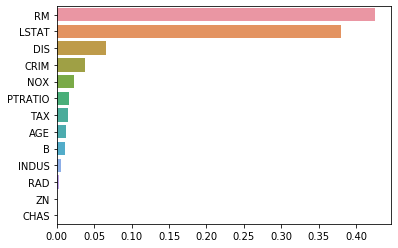

In [111]:
# 보스턴 주택 가격 모델의 피처별 중요도 시각화
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


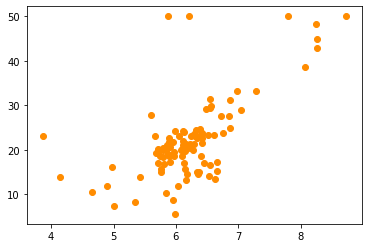

In [112]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출.
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

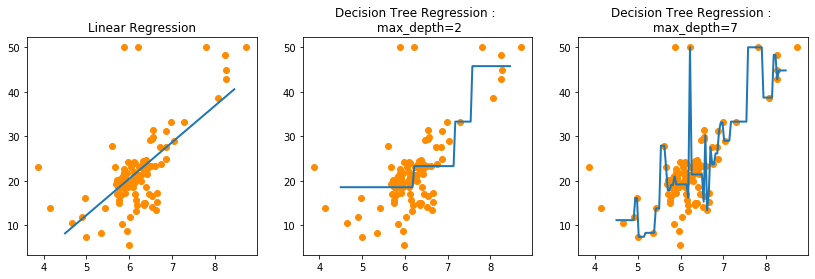

In [118]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DEcisonTreeRegression의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression : \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

# DecisionTreeRegression의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression : \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

## 회귀 실습 - 자전거 대여 수요 예측  
데이터 세트 : https://www.kaggle.com/c/bike-sharing-demand/data  
* 데이터 세트 설명  
    1) 2011년 1월부터 2012년 12월까지 날짜/시간, 기온, 습도, 풍속 등의 정보를 기반으로 1시간 간격 동안의 자전거 대여 횟수가 기재돼 있음.  
    2) 결정값 : count(대여 횟수)  
<br>

### 데이터 클렌징 및 가공  

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [168]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [169]:
# object형인 datatime 컬럼을 가공해 줘야 함.
# 문자열을 datatime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [170]:
# datetime, casual, registered 칼럼 삭제
drop_columns = ['datetime', 'casual', 'registered']
bike_df = bike_df.drop(drop_columns, axis=1, inplace=False)

In [174]:
# 예측 성능을 평가하는 함수 만들기
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE(Root Mean Square Log Error) 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val, rmse_val, mae_val))

### 로그 변환, 피처 인코딩과 모델 학습/예측/평가  
* 결과값이 정규 분포로 돼 있는가?  
* 카테고리형 회귀 모델의 경우 원-핫 인코딩으로 피처 인코딩.

In [175]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE : 140.900, MAE : 105.924


In [176]:
# 실제값과 lr_reg모델로 얻은 예측값이 얼마나 차이 나는지 확인하기
def get_top_error_data(y_test, pred, n_tops=5):
    # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


* 상위 5위 오류값은 546~568로 예측 오류가 꽤 큼.  
* 회귀에서 큰 예측 오류가 발생할 경우 가장 먼저 살펴볼 것은 Target값의 분포가 왜곡된 형태를 이루고 있는지 확인해야 함.  
* Target값의 분포는 정규 분포가 가장 좋음.  

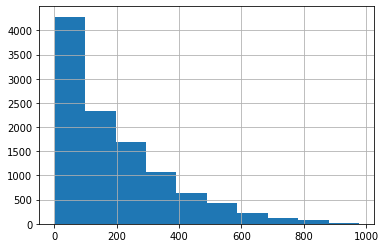

In [181]:
# Target값(count) 분포 확인
y_target.hist()

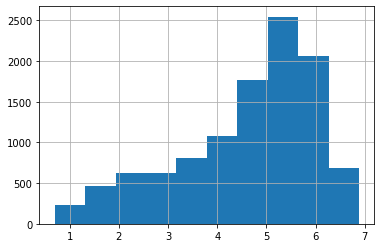

In [182]:
# Target값 정규 분포로 바꾸기 -> np.log1p()
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [184]:
# Target값을 정규분포 형태로 변환 후 다시 학습/예측/평가 수행
# 타깃 칼럼인 count값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE : 1.017, RMSE : 162.594, MAE : 109.286


RMSLE 오류는 줄어들었지만 RMSE는 오히려 더 늘어남. 이유가 무엇일까? 각 피처의 회귀 계수 값을 시각화해 보자.

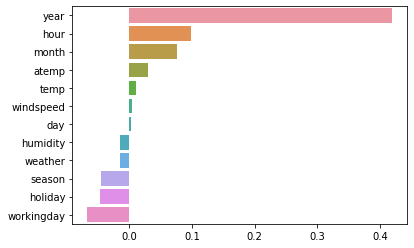

In [185]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

year 피처의 회귀 계수 값이 독보적으로 큰 값을 가지고 있음.  
year는 2011년, 2012년 두 개의 값으로 돼 있음. year에 따라서 자전거 대여 횟수가 크게 영향을 받는다는 것은 납득하기 어려움. 왜 그런 것일까?  

        1) year 피처는 연도를 뜻하므로 카테고리형 피처지만 숫자형 값으로 돼 있음.  
        2) 숫자형 카테고리값을 선형 회귀에 사용할 경우 회귀 계수를 연산할 때 이 숫자형 값에 크게 영향을 받는 경우가 발생할 수 있음.  
        3) **따라서 선형 회귀에서는 이러한 피처 인코딩에 원-핫 인코딩을 적용해 변환해야 함!**  

get_dummies()를 이용해 year뿐만 아니라 month, day, hour, holiday, workingday, season, weather 모두 원-핫 인코딩 하자!

In [188]:
# 'year', 'month', 'day', 'hour' 등의 피처를 One-Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [191]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환.
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print("###", model.__class__.__name__, "###")
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : 0.590, RMSE : 97.688, MAE : 63.382
### Ridge ###
RMSLE : 0.590, RMSE : 98.529, MAE : 63.893
### Lasso ###
RMSLE : 0.635, RMSE : 113.219, MAE : 72.803


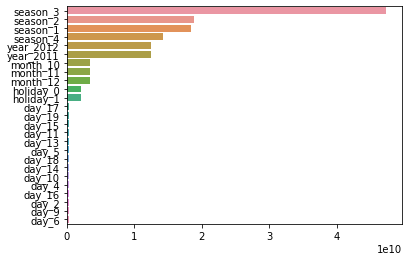

In [193]:
# 회귀 계수 상위 25개 피처 추출하기
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [194]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE : 0.355, RMSE : 50.364, MAE : 31.197
### GradientBoostingRegressor ###
RMSLE : 0.330, RMSE : 53.338, MAE : 32.743
[18:03:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE : 0.345, RMSE : 58.245, MAE : 35.768
### LGBMRegressor ###
RMSLE : 0.319, RMSE : 47.215, MAE : 29.029


## 회귀 실습 - 캐글 주택 가격 : 고급 회기 기법  
데이터 세트 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data  

        1) 79개의 변수로 구성.  
        2) 미국 아이오와 주의 에임스(Ames) 지방의 주택 가격 정보.  
        3) 각 피처에 대한 설명은 https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data 참고.  
        4) 성능 평가는 RMSLE를 기반으로 함.  
        5) Target값은 SalePrice  
<br>

### 데이터 사전 처리(Preprocessing)

In [290]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [291]:
print("데이터 세트의 Shape : ", house_df.shape)
print("\n전체 피처의 type \n", house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print("\nNull 칼럼과 그 건수 : \n", isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape :  (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수 : 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


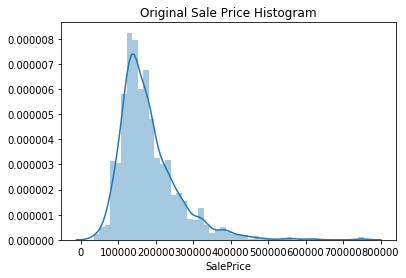

In [292]:
# 타깃값의 분포도 확인
plt.title("Original Sale Price Histogram")
sns.distplot(house_df['SalePrice'])

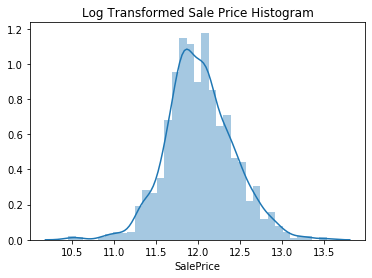

In [293]:
# 타깃값 log1p를 이용해 로그 변환 적용.
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [294]:
# SlaePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
# PoolQC, MiscFeature, Alley, Fence, FireplaceQu : Null값이 너무 많음. Id : 단순 식별자
house_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'Id'], axis=1, inplace=True)

# 드롭하지 않는 숫자형 Null 칼럼은 평균값으로 대체
house_df.fillna(house_df.mean(), inplace=True)

# Null값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print("## Null 피처의 Type : \n", house_df.dtypes[null_column_count.index])

## Null 피처의 Type : 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


문자형 피처를 제외하고는 Null값이 없음.  
문자형 피처를 원-핫 인코딩으로 변환함.  
get_dummies()는 자동으로 Null값은 None칼럼으로 대체해주기 때문에 별도의 Null값을 대체하는 로직이 필요 없음.

In [295]:
# 문자형 피처 원-핫 인코딩 변환
print("get_dummies() 수행 전 데이터 Shape : ", house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print("get_dummies() 수행 후 데이터 Shape : ", house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print("## Null 피처의 Type : \n", house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape :  (1460, 75)
get_dummies() 수행 후 데이터 Shape :  (1460, 271)
## Null 피처의 Type : 
 Series([], dtype: object)


### 선형 회귀 모델 학습/예측/평가  
이미 타깃값이 로그 변환되었기 때문에 예측값 역시 로그 변환된 값을 기반으로 예측하므로 원본 예측값의 로그 변환값임.  
따라서 예측 결과 오류에 RMSE만 적용하면 자동적으로 RMSLE로 측정됨.

In [296]:
# 여러 모델의 로그 변환된 RMSE를 측정하는 함수 생성
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, "로그 변환된 RMSE : ", np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [297]:
# 선형 회귀 모델을 학습/예측/평가
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE :  0.132
Ridge 로그 변환된 RMSE :  0.128
Lasso 로그 변환된 RMSE :  0.176


[0.1318957657915388, 0.1275084633405302, 0.17628250556471406]

In [298]:
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개, - 하위 10개의 회귀 계수를 추출해 반환.
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

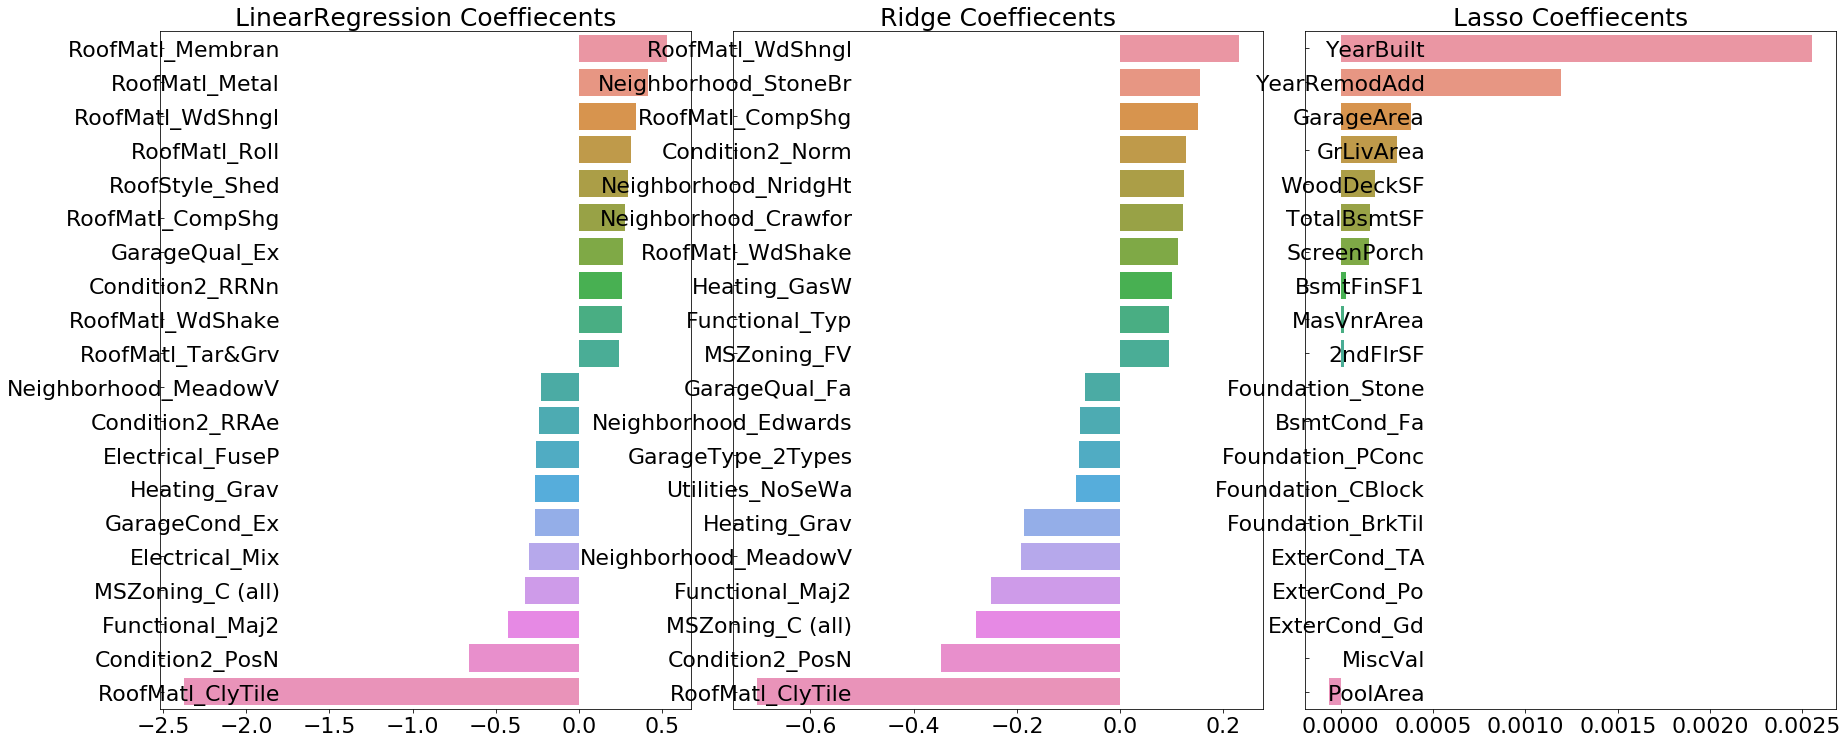

In [299]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        # ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__ + " Coeffiecents", size=25)
        axs[i_num].tick_params(axis="y", direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [301]:
# 학습과 테스트 데이터 세트를 train_test_split()으로 분할하지 않고 전체 데이터 세트인 X_featrues와 y_target을 5개의 교차 검증 폴드 세트로 분할해 평균 RMSE를 측정해 봄.
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv=5))
        
        rmse_avg = np.mean(rmse_list)
        print("\n{0} CV RMSE값 리스트 : {1}".format(model.__class__.__name__, np.round(rmse_list, 3)))
        print("{0} CV 평균 RMSE값 : {1}".format(model.__class__.__name__, np.round(rmse_avg, 3)))
        
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE값 리스트 : [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE값 : 0.155

Ridge CV RMSE값 리스트 : [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE값 : 0.144

Lasso CV RMSE값 리스트 : [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE값 : 0.198


In [302]:
# 릿지 모델과 라쏘 모델의 최적화 alpha값 추출
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring="neg_mean_squared_error", cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print("{0} 5 CV시 최적 평균 RMSE값 : {1}, 최적 alpha : {2}".format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    
ridge_params = { 'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] }
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE값 : 0.1418, 최적 alpha : {'alpha': 12}
Lasso 5 CV시 최적 평균 RMSE값 : 0.142, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE :  0.132
Ridge 로그 변환된 RMSE :  0.124
Lasso 로그 변환된 RMSE :  0.12


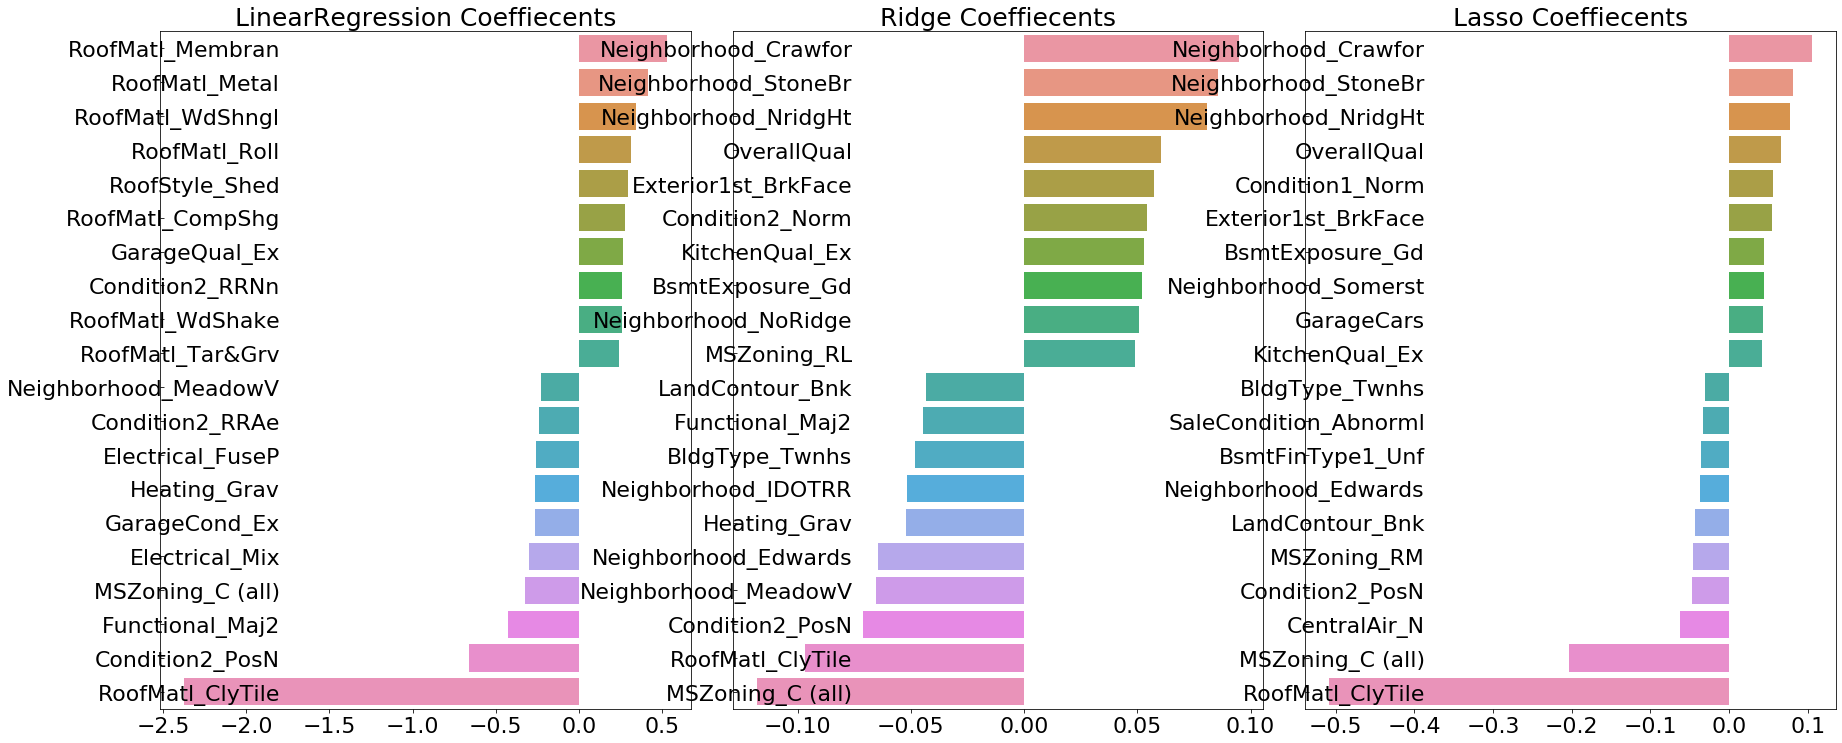

In [303]:
# 앞의 최적화 alpha값으로 학습 데이터 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

* 데이터셋 추가 가공1 : 피처 데이터 세트 분포도 확인  
        
        1) 사이파이 stats 모듈의 skew() 함수를 이용해 칼럼의 데이터 세트의 왜곡된 정보를 확인할 수 있음.  
        2) skew() 함수의 반환값이 1 이상인 경우를 왜곡 정도가 높다고 판단.  
        3) 이 데이터셋에서는 1 이상의 값을 반환하는 피처만 추출해 왜곡 정도를 완하하기 위해 로그 변환을 적용할 것임.  
        4) 주의할 점 : skew()를 적용하는 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처는 제외해야 함.  

In [304]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew() 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [305]:
# 추출된 왜곡 정도가 높은 피처를 로그 변환함.
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [306]:
# 왜곡 정도가 높은 피처를 로그 변환했으므로 다시 원-핫 인코딩을 적용하고 피처/타깃 데이터 세트 생성
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처를 로그 변환한 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] }
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE값 : 0.1275, 최적 alpha : {'alpha': 10}
Lasso 5 CV시 최적 평균 RMSE값 : 0.1252, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE :  0.128
Ridge 로그 변환된 RMSE :  0.122
Lasso 로그 변환된 RMSE :  0.119


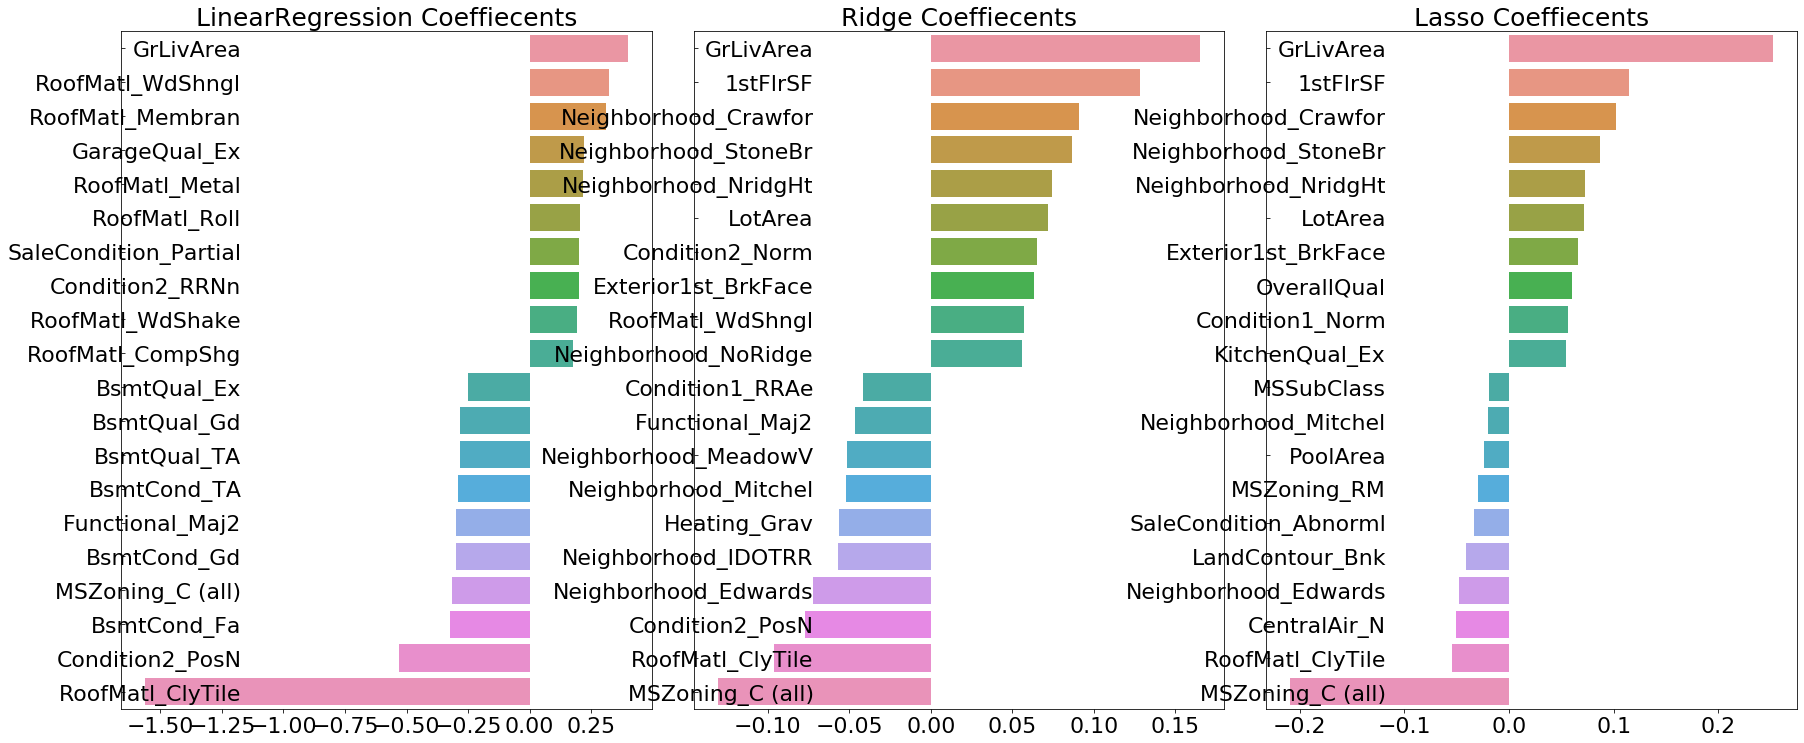

In [307]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

* 데이터셋 추가 가공2 : 이상치 데이터  

        1) 예측에 많은 영향을 미치는 중요 피처의 이상치 데이터의 처리가 중요함.  
        2) 세 모델에 가장 큰 회귀 계수를 가지는 GrLivArea 피처의 데이터 분포를 살펴보자.

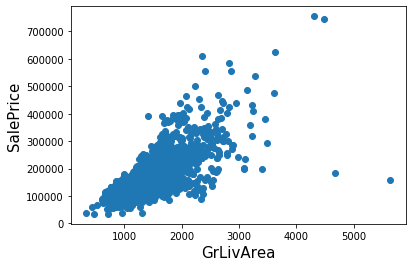

In [308]:
# GrLivArea와 타깃값인 SalePrice의 관계 시각화하기
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.show()

일반적으로 주거 공간이 큰 집일수록 가격이 비싸기 때문에 GrLivArea 피처는 SalePrice와 양의 상관도가 매우 높음을 직관적으로 알 수 있음.  
하지만 그래프의 4000 후반~5000후반에 저렇게 낮은 가격은 너무 어긋남.  
따라서 GrLivArea가 4000평방피트 이상임에도 가격이 500,000달러 이하인 데이터는 모두 이상치로 간주하고 삭제함.

In [309]:
# GrLivArea와 SalePrice 모두 로그 변환됐으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print("이상치 레코드 index : ", outlier_index.values)
print("이상치 삭제전 house_df_ohe shape : ", house_df_ohe.shape)

# DataFrame의 인덱스를 이용해 이상치 레코드 삭제
house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print("이상치 삭제 후 house_df_ohe shape : ", house_df_ohe.shape)

이상치 레코드 index :  [ 523 1298]
이상치 삭제전 house_df_ohe shape :  (1460, 271)
이상치 삭제 후 house_df_ohe shape :  (1458, 271)


In [316]:
# 업데이트 된 house_df_hoe를 기반으로 다시 학습/예측/평가
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10] }
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE값 : 0.1125, 최적 alpha : {'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE값 : 0.1122, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE :  0.129
Ridge 로그 변환된 RMSE :  0.103
Lasso 로그 변환된 RMSE :  0.1


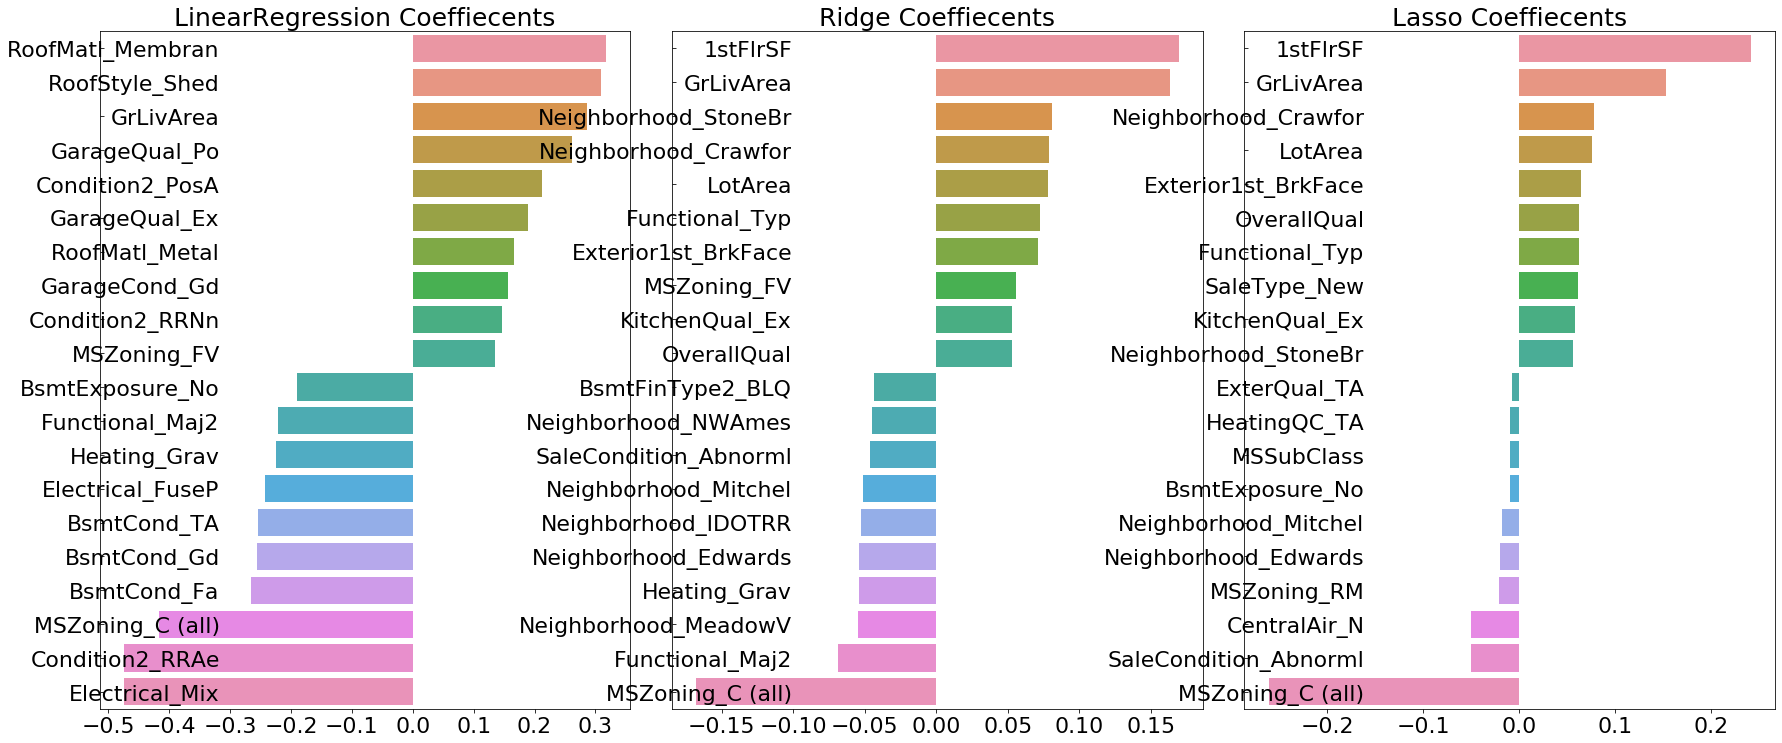

In [317]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 회귀 트리 모델 학습/예측/평가  

In [318]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators' : [1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)

[21:50:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV시 최적 평균 RMSE값 : 0.115, 최적 alpha : {'n_estimators': 1000}


In [319]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators' : [1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV시 최적 평균 RMSE값 : 0.1165, 최적 alpha : {'n_estimators': 1000}


[22:03:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


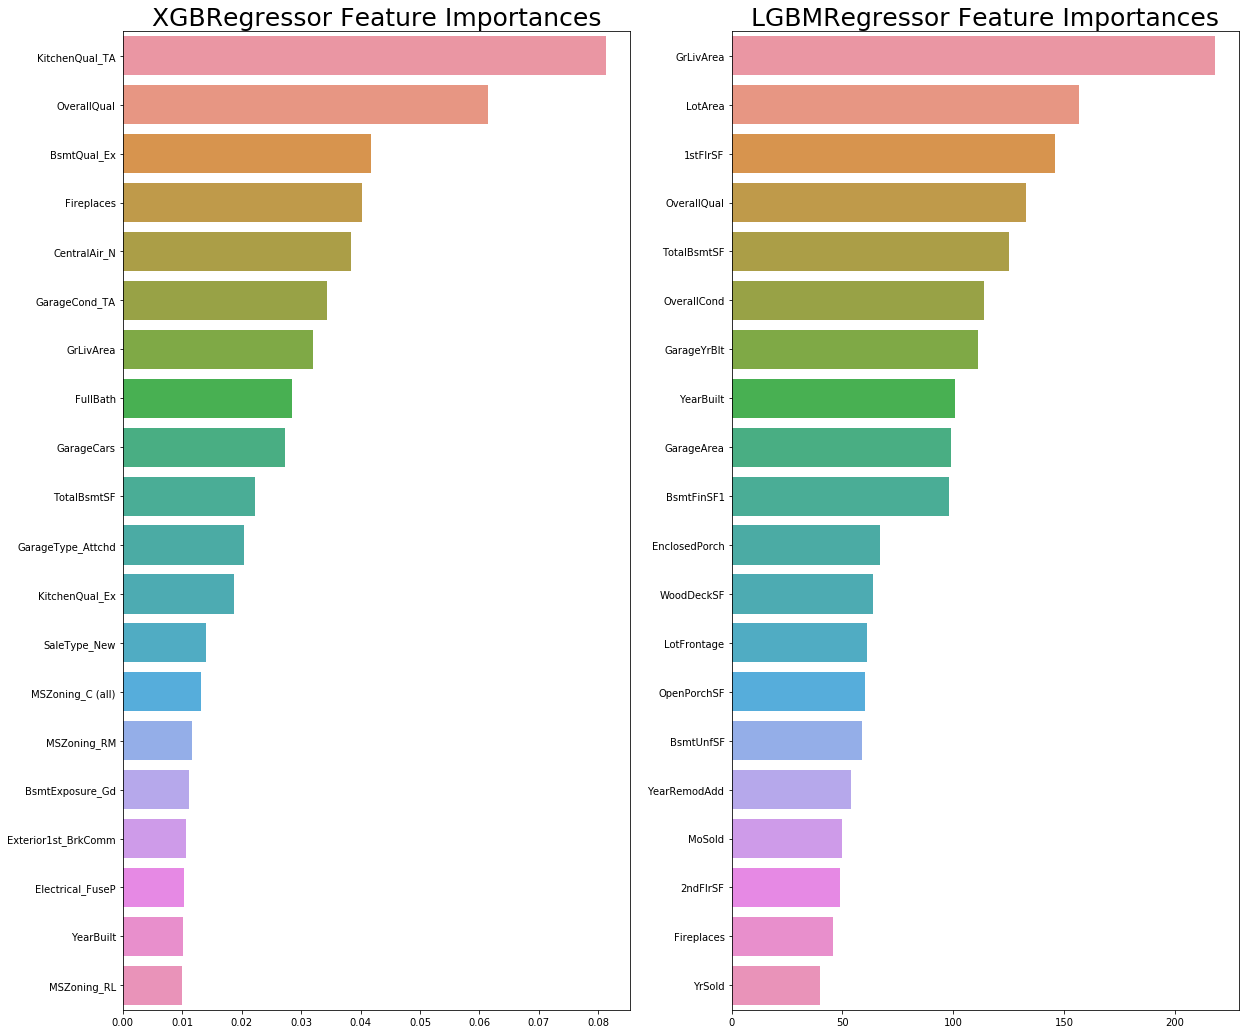

In [328]:
fig, ax = plt.subplots(figsize=(20, 18), nrows=1, ncols=2)
models = [xgb_reg, lgbm_reg]

for i_num, model in enumerate(models):
    model.fit(X_train, y_train)
    
    ax[i_num].set_title(model.__class__.__name__ + " Feature Importances", size=25)
    feature_series = pd.Series(data=model.feature_importances_, index=X_train.columns)
    feature_series = feature_series.sort_values(ascending=False)[:20]
    sns.barplot(x=feature_series, y=feature_series.index, ax=ax[i_num])

### 회귀 모델의 예측 결과 혼합을 통한 최종 예측  
A, B 두 모델이 있을 때 A 모델 예측값의 40%, B 모델 예측값의 60%를 더해 최종 회귀값으로 예측하는 것.
A 회귀 모델의 예측값 : [100, 80, 60], B 회귀 모델의 예측값 : [120, 80, 50]  
최종 회귀 예측값 : [100 * 0.4 + 120 * 0.6, 80 * 0.4 + 80 * 0.6 + 60 * 0.4 + 50 * 0.6]

In [331]:
# 앞에서 구한 릿지 모델과 라쏘 모델을 서로 혼합해 보기.
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print("{0} 모델의 RMSE : {1}".format(key, mse))
        
# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종 혼합' : pred,
         'Ridge' : ridge_pred, 
         'Lasso' : lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.010015868058833885
Ridge 모델의 RMSE : 0.01070226984707442
Lasso 모델의 RMSE : 0.010048399342898046


In [333]:
# XGBoost와 LightGBM을 혼합해 RMSE값 출력
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종 혼합' : pred, 
         'XGBM' : xgb_pred, 
         'LGBM' : lgbm_pred}

get_rmse_pred(preds)

[22:17:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE : 0.009796477912837352
XGBM 모델의 RMSE : 0.010150795932135387
LGBM 모델의 RMSE : 0.01030358419073709


### 스태킹 앙상블 모델을 통한 회귀 예측  

In [341]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print("\t 폴드 세트 : ", folder_counter, " 시작 ")
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [343]:
# get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
Lasso model 시작
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
XGBRegressor model 시작
	 폴드 세트 :  0  시작 
[12:40:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트 :  1  시작 
[12:40:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트 :  2  시작 
[12:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트 :  3  시작 
[12:40:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트 :  4  시작 
[12:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor model 시작
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴

In [346]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

# 개별 모델 에측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print("스태킹 회귀 모델의 최종 RMSE 값은 : ", rmse)

스태킹 회귀 모델의 최종 RMSE 값은 :  0.09738961783055008
